# **Chi-Square Test of Independence** 

## **The Scenario**
Marketing and Design Team comes up with a New Packaging for a Dog Food Company.
Everyone in the team agrees that it's Unique and they love it. But, since the packing is heavier the Product Manager is worried whether it would increase the Sales of the Product as well or, it would just create problems during delivery and distribution.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.stats import chi2_contingency

In [8]:
#load categorical data
df = pd.read_excel('Case 1 - Chi-square test of independence.xlsx')

In [9]:
df.head(3)

,Respondent,Uniqueness,Purchase Likelihood
0,1,Extremely unique,Extremely likely
1,2,Extremely unique,Extremely likely
2,3,Extremely unique,Extremely likely


In [10]:
df_crosstab = pd.crosstab(df['Uniqueness'],df['Purchase Likelihood'])
df_crosstab

Purchase Likelihood,Extremely likely,Not at all likely,Not so likely,Somewhat likely,Very likely
Uniqueness,,,,,
Extremely unique,12,10,10,13,25
Not at all unique,5,11,5,4,8
Not so unique,7,9,10,8,16
Somewhat unique,15,16,15,16,28
Very unique,52,30,30,64,104


In [11]:
sorter = ['Extremely likely','Very likely','Somewhat likely','Not so likely','Not at all likely']
sorter2 = ['Extremely unique','Very unique','Somewhat unique','Not so unique','Not at all unique']

In [13]:
df_crosstab = df_crosstab[sorter]
df_crosstab = df_crosstab.loc[sorter2]
df_crosstab

Purchase Likelihood,Extremely likely,Very likely,Somewhat likely,Not so likely,Not at all likely
Uniqueness,,,,,
Extremely unique,12,25,13,10,10
Very unique,52,104,64,30,30
Somewhat unique,15,28,16,15,16
Not so unique,7,16,8,10,9
Not at all unique,5,8,4,5,11


In [18]:
# contingency table with celss color according to magnitude
df_crosstab.style.background_gradient(cmap = 'Blues',vmin = 0, vmax =100)

Purchase Likelihood,Extremely likely,Very likely,Somewhat likely,Not so likely,Not at all likely
Uniqueness,,,,,
Extremely unique,12,25,13,10,10
Very unique,52,104,64,30,30
Somewhat unique,15,28,16,15,16
Not so unique,7,16,8,10,9
Not at all unique,5,8,4,5,11


## **Create contingency table and make value proportions**

In [24]:
df_proportions = pd.crosstab(df['Uniqueness'],df['Purchase Likelihood'],normalize = True)

In [25]:
df_proportions

Purchase Likelihood,Extremely likely,Not at all likely,Not so likely,Somewhat likely,Very likely
Uniqueness,,,,,
Extremely unique,0.022945,0.019120,0.019120,0.024857,0.047801
Not at all unique,0.009560,0.021033,0.009560,0.007648,0.015296
Not so unique,0.013384,0.017208,0.019120,0.015296,0.030593
Somewhat unique,0.028681,0.030593,0.028681,0.030593,0.053537
Very unique,0.099426,0.057361,0.057361,0.122371,0.198853


In [26]:
df_proportions = df_proportions[sorter]
df_proportions = df_proportions.loc[sorter2]
df_proportions

Purchase Likelihood,Extremely likely,Very likely,Somewhat likely,Not so likely,Not at all likely
Uniqueness,,,,,
Extremely unique,0.022945,0.047801,0.024857,0.019120,0.019120
Very unique,0.099426,0.198853,0.122371,0.057361,0.057361
Somewhat unique,0.028681,0.053537,0.030593,0.028681,0.030593
Not so unique,0.013384,0.030593,0.015296,0.019120,0.017208
Not at all unique,0.009560,0.015296,0.007648,0.009560,0.021033


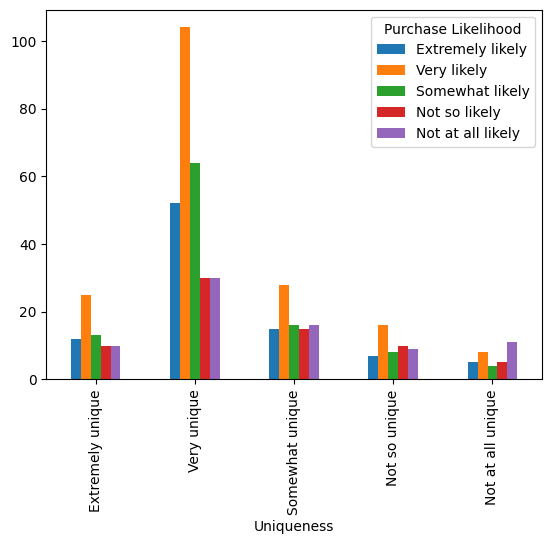

In [30]:
#Plot Clustered with bar chart to visible
df_crosstab.plot.bar(rot = 0)
plt.xticks(rotation = 90)
plt.show()

## **Setting the hypothesis**

**Our goal is to examine the claim that the uniqueness of the packaging affects the propensity of consumers to buy the product based on the packaging.**
Therefore, the null and alternative hypotheses can be formulated as follows:

- H0: **Uniqueness is not associated with 'Purchase intent'**
- H1: **Uniqueness is associated with 'Purchase intent'**
    
The significance level alpha is set to 0.05.

We can now run the test.

In [32]:
# store the output into variables
stat,p,dof,expected = chi2_contingency(df_crosstab,correction = False)
print("Chi-square Statistic:", stat)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

Chi-square Statistic: 21.388569942634078
p-value: 0.1640533250506747
Degrees of Freedom: 16
Expected Frequencies:
 [[12.17973231 24.22562141 14.05353728  9.36902486 10.17208413]
 [48.71892925 96.90248566 56.21414914 37.47609943 40.68833652]
 [15.65965583 31.14722753 18.06883365 12.0458891  13.07839388]
 [ 8.6998088  17.3040153  10.03824092  6.69216061  7.26577438]
 [ 5.7418738  11.4206501   6.62523901  4.416826    4.79541109]]


## **Interpreting the Output**

**The p-value (0.1641) exceeds the pre-established alpha of 0.05. This leads us not to reject the null hypothesis—suggesting no significant link between the product packaging's distinctiveness and the likelihood of consumers purchasing it at a significance level of 0.05.**